<a href="https://colab.research.google.com/github/shreya139/Circuits-in-Stocks/blob/main/Circuit_Identification_Updated_LU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import missingno as mn
from pandas_datareader import data as pdr
import numpy as np

In [5]:
stock_list= ['YESBANK', 'SALASAR','TTML','APTUS', 'ASIANENE', 'MANGCHEFER','ELECTHERM','RENUKA', 'PRESSMN', 'APLLTD','PCJEWELLER',
             'PODDARHOUS', 'MBLINFRA', 'KAMDHENU','SGL', 'OILCOUNTUB','SUULD', 'KSHITIJPOL','CONSOFINVT']

In [ ]:
len(stock_list)

19

In [ ]:
for i in range(len(stock_list)):
  stock_list[i] += '.NS'
stock_list

['YESBANK.NS',
 'SALASAR.NS',
 'TTML.NS',
 'APTUS.NS',
 'ASIANENE.NS',
 'MANGCHEFER.NS',
 'ELECTHERM.NS',
 'RENUKA.NS',
 'PRESSMN.NS',
 'APLLTD.NS',
 'PCJEWELLER.NS',
 'PODDARHOUS.NS',
 'MBLINFRA.NS',
 'KAMDHENU.NS',
 'SGL.NS',
 'OILCOUNTUB.NS',
 'SUULD.NS',
 'KSHITIJPOL.NS',
 'CONSOFINVT.NS']

In [6]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

data = pdr.get_data_yahoo(stock_list, start="2023-03-01", end="2023-03-08",interval="1m")

[*********************100%***********************]  19 of 19 completed

19 Failed downloads:
- MBLINFRA: No timezone found, symbol may be delisted
- OILCOUNTUB: No timezone found, symbol may be delisted
- CONSOFINVT: No timezone found, symbol may be delisted
- PODDARHOUS: No timezone found, symbol may be delisted
- APTUS: No timezone found, symbol may be delisted
- RENUKA: No timezone found, symbol may be delisted
- APLLTD: No timezone found, symbol may be delisted
- ELECTHERM: No timezone found, symbol may be delisted
- KSHITIJPOL: No timezone found, symbol may be delisted
- PCJEWELLER: No timezone found, symbol may be delisted
- SUULD: No timezone found, symbol may be delisted
- SALASAR: No timezone found, symbol may be delisted
- YESBANK: No timezone found, symbol may be delisted
- SGL: No data found for this date range, symbol may be delisted
- ASIANENE: No timezone found, symbol may be delisted
- KAMDHENU: No timezone found, symbol may be delisted
- TTML: No timezone found, symbol

In [ ]:
data

Adj Close                                        \
                            APLLTD.NS    APTUS.NS ASIANENE.NS CONSOFINVT.NS   
Datetime                                                                      
2023-03-01 09:15:00+05:30  510.049988  244.100006   56.049999           NaN   
2023-03-01 09:16:00+05:30  510.000000  243.850006   56.200001           NaN   
2023-03-01 09:17:00+05:30  510.450012  243.250000   56.000000           NaN   
2023-03-01 09:18:00+05:30  510.299988  243.699997         NaN           NaN   
2023-03-01 09:19:00+05:30  510.500000  243.350006   55.950001           NaN   
...                               ...         ...         ...           ...   
2023-03-06 15:25:00+05:30  525.000000  283.700012   79.199997    112.000000   
2023-03-06 15:26:00+05:30  525.500000  283.700012         NaN           NaN   
2023-03-06 15:27:00+05:30  526.750000  283.700012         NaN    112.000000   
2023-03-06 15:28:00+05:30  524.500000  283.700012   78.900002    112.300003   
2023-03-06 15:29:00+05:30  526.000000  280.500000         NaN    111.900002   

                                                                  \
                          ELECTHERM.NS KAMDHENU.NS KSHITIJPOL.NS   
Datetime                                                           
2023-03-01 09:15:00+05:30          NaN  333.799988     20.900000   
2023-03-01 09:16:00+05:30          NaN  332.100006     20.900000   
2023-03-01 09:17:00+05:30          NaN  332.049988     20.900000   
2023-03-01 09:18:00+05:30          NaN  333.899994     20.900000   
2023-03-01 09:19:00+05:30          NaN  334.750000     20.900000   
...                                ...         ...           ...   
2023-03-06 15:25:00+05:30    64.000000  324.649994     21.549999   
2023-03-06 15:26:00+05:30    64.000000  324.899994     21.549999   
2023-03-06 15:27:00+05:30    63.900002  324.899994     21.549999   
2023-03-06 15:28:00+05:30    63.700001  324.950012     21.549999   
2023-03-06 15:29:00+05:30    63.750000  324.399994     21.549999   

                                                                   ...  \
                          MANGCHEFER.NS MBLINFRA.NS OILCOUNTUB.NS  ...   
Datetime                                                           ...   
2023-03-01 09:15:00+05:30     75.000000   16.299999         14.15  ...   
2023-03-01 09:16:00+05:30     74.650002   17.250000           NaN  ...   
2023-03-01 09:17:00+05:30     74.349998         NaN           NaN  ...   
2023-03-01 09:18:00+05:30     74.400002   17.150000         14.80  ...   
2023-03-01 09:19:00+05:30           NaN         NaN         14.80  ...   
...                                 ...         ...           ...  ...   
2023-03-06 15:25:00+05:30     88.400002         NaN           NaN  ...   
2023-03-06 15:26:00+05:30     88.099998         NaN           NaN  ...   
2023-03-06 15:27:00+05:30     88.300003         NaN           NaN  ...   
2023-03-06 15:28:00+05:30     88.650002         NaN         17.00  ...   
2023-03-06 15:29:00+05:30     88.500000         NaN           NaN  ...   

                                 Volume                              \
                          OILCOUNTUB.NS PCJEWELLER.NS PODDARHOUS.NS   
Datetime                                                              
2023-03-01 09:15:00+05:30           0.0           0.0           0.0   
2023-03-01 09:16:00+05:30           NaN      104867.0        4057.0   
2023-03-01 09:17:00+05:30           NaN      221451.0         334.0   
2023-03-01 09:18:00+05:30          97.0      239918.0         156.0   
2023-03-01 09:19:00+05:30         102.0      143522.0         148.0   
...                                 ...           ...           ...   
2023-03-06 15:25:00+05:30           NaN           NaN          22.0   
2023-03-06 15:26:00+05:30           NaN           NaN           NaN   
2023-03-06 15:27:00+05:30           NaN           0.0           NaN   
2023-03-06 15:28:00+05:30       19154.0         414.0           NaN   
2023-03-

In [ ]:
data.to_csv("pennystocks.csv",index=True)

<AxesSubplot:>

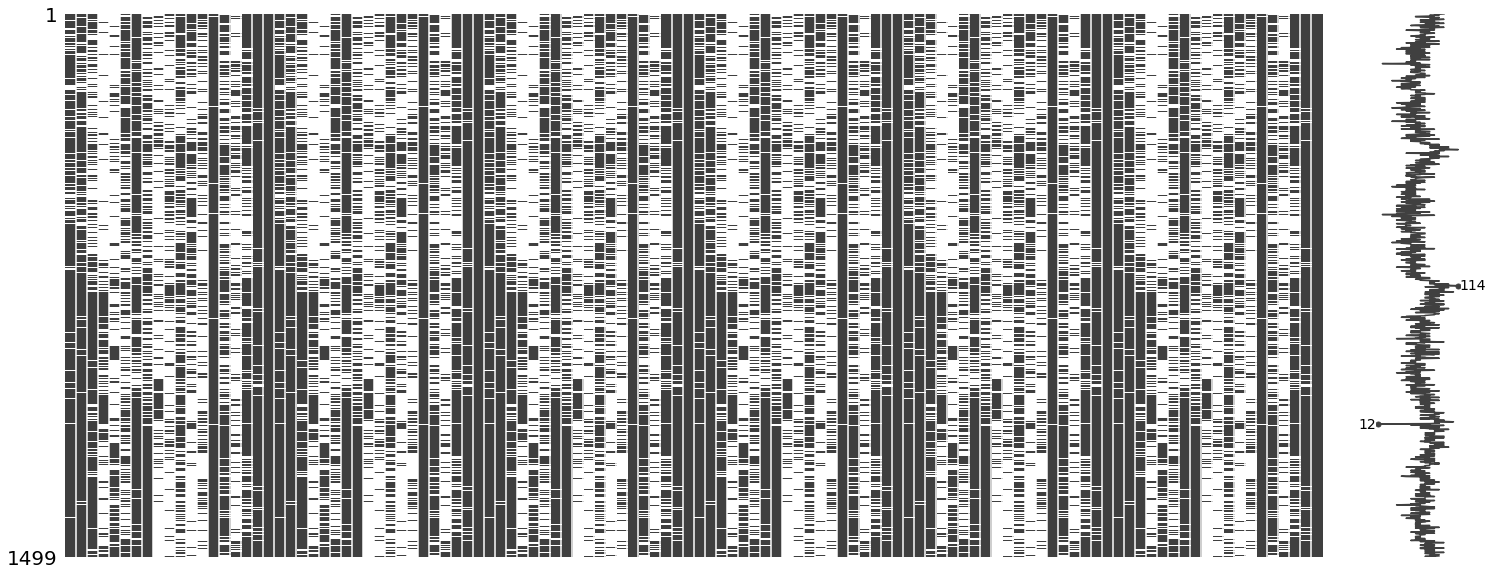

In [ ]:
mn.matrix(data)

In [ ]:
data.columns = [f'{i}{j}' for i,j in data.columns]
data

,Adj CloseAPLLTD.NS,Adj CloseAPTUS.NS,Adj CloseASIANENE.NS,Adj CloseCONSOFINVT.NS,Adj CloseELECTHERM.NS,Adj CloseKAMDHENU.NS,Adj CloseKSHITIJPOL.NS,Adj CloseMANGCHEFER.NS,Adj CloseMBLINFRA.NS,Adj CloseOILCOUNTUB.NS,...,VolumeOILCOUNTUB.NS,VolumePCJEWELLER.NS,VolumePODDARHOUS.NS,VolumePRESSMN.NS,VolumeRENUKA.NS,VolumeSALASAR.NS,VolumeSGL.NS,VolumeSUULD.NS,VolumeTTML.NS,VolumeYESBANK.NS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 09:15:00+05:30,510.049988,244.100006,56.049999,NaN,NaN,333.799988,20.900000,75.000000,16.299999,14.15,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2023-03-01 09:16:00+05:30,510.000000,243.850006,56.200001,NaN,NaN,332.100006,20.900000,74.650002,17.250000,NaN,...,NaN,104867.0,4057.0,3694.0,25737.0,0.0,NaN,239.0,100597.0,3283764.0
2023-03-01 09:17:00+05:30,510.450012,243.250000,56.000000,NaN,NaN,332.049988,20.900000,74.349998,NaN,NaN,...,NaN,221451.0,334.0,2110.0,33680.0,1196.0,NaN,653.0,69345.0,974480.0
2023-03-01 09:18:00+05:30,510.299988,243.699997,NaN,NaN,NaN,333.899994,20.900000,74.400002,17.150000,14.80,...,97.0,239918.0,156.0,1710.0,31178.0,1052.0,NaN,1936.0,60062.0,2927528.0
2023-03-01 09:19:00+05:30,510.500000,243.350006,55.950001,NaN,NaN,334.750000,20.900000,NaN,NaN,14.80,...,102.0,143522.0,148.0,671.0,20494.0,NaN,NaN,0.0,25729.0,3238288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06 15:25:00+05:30,525.000000,283.700012,79.199997,112.000000,64.000000,324.649994,21.549999,88.400002,NaN,NaN,...,NaN,NaN,22.0,NaN,70816.0,NaN,0.0,581.0,42.0,954955.0
2023-03-06 15:26:00+05:30,525.500000,283.700012,NaN,NaN,64.000000,324.899994,21.549999,88.099998,NaN,NaN,...,NaN,NaN,NaN,NaN,56448.0,0.0,39212.0,1290.0,637.0,401459.0
2023-03-06 15:27:00+05:30,526.750000,283.700012,NaN,112.000000,63.900002,324.899994,21.549999,88.300003,NaN,NaN,...,NaN,0.0,NaN,NaN,92099.0,2033.0,1947.0,3421.0,365.0,446912.0


In [ ]:
data['Datetime'] = list(data.index)
long_df = pd.wide_to_long(data, 
                stubnames = ['Adj Close','Close','High','Open','Low', 'Volume'], 
                i=['Datetime'], 
                j='Stock', 
                suffix= '.+', 
                sep='')

In [ ]:
long_df

,,Adj Close,Close,High,Open,Low,Volume
Datetime,Stock,,,,,,
2023-03-01 09:15:00+05:30,APLLTD.NS,510.049988,510.049988,510.049988,510.049988,510.049988,0.0
2023-03-01 09:16:00+05:30,APLLTD.NS,510.000000,510.000000,511.049988,510.000000,510.000000,60.0
2023-03-01 09:17:00+05:30,APLLTD.NS,510.450012,510.450012,510.850006,510.000000,509.350006,81.0
2023-03-01 09:18:00+05:30,APLLTD.NS,510.299988,510.299988,510.299988,509.450012,509.450012,49.0
2023-03-01 09:19:00+05:30,APLLTD.NS,510.500000,510.500000,510.500000,510.500000,510.500000,21.0
...,...,...,...,...,...,...,...
2023-03-06 15:25:00+05:30,YESBANK.NS,16.900000,16.900000,16.900000,16.900000,16.850000,954955.0
2023-03-06 15:26:00+05:30,YESBANK.NS,16.900000,16.900000,16.900000,16.900000,16.850000,401459.0
2023-03-06 15:27:00+05:30,YESBANK.NS,16.900000,16.900000,16.900000,16.900000,16.850000,446912.0


<AxesSubplot:>

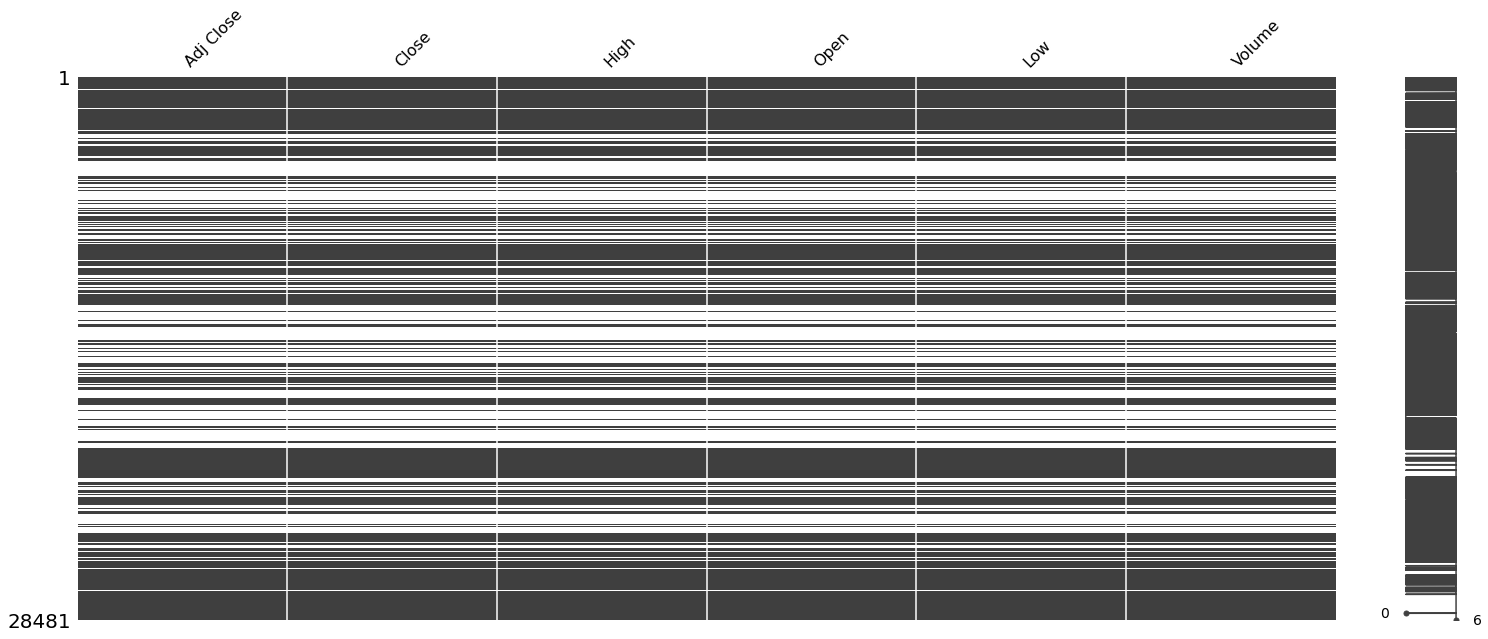

In [ ]:
mn.matrix(long_df)

In [ ]:
yf.pdr_override()

data2 = pdr.get_data_yahoo(stock_list, start="2023-03-01", end="2023-03-08",interval="30m")

[*********************100%***********************]  19 of 19 completed


<AxesSubplot:>

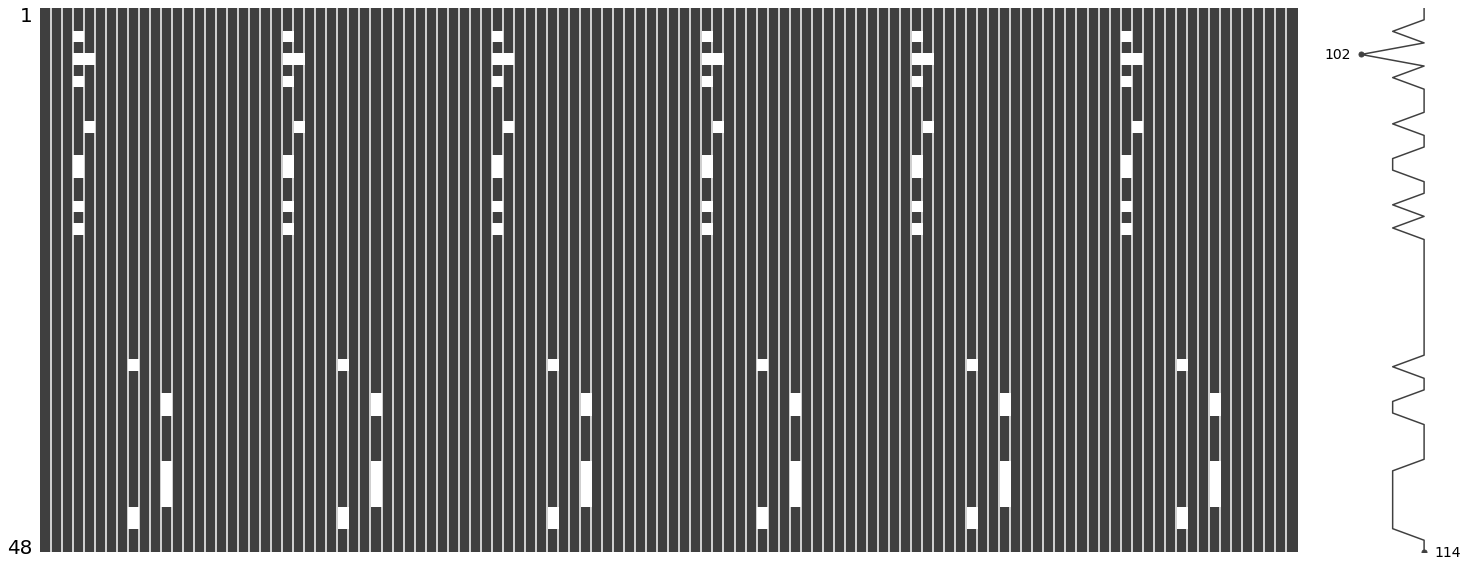

In [ ]:
mn.matrix(data2)

In [ ]:
data2.columns = [f'{i}{j}' for i,j in data2.columns]

In [ ]:
data2['Datetime'] = list(data2.index)
long_df2 = pd.wide_to_long(data2, 
                stubnames = ['Adj Close','Close','High','Open','Low', 'Volume'], 
                i=['Datetime'], 
                j='Stock', 
                suffix= '.+', 
                sep='')

In [ ]:
long_df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 912 entries, (Timestamp('2023-03-01 09:30:00'), 'APLLTD.NS') to (Timestamp('2023-03-06 15:00:00'), 'YESBANK.NS')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  894 non-null    float64
 1   Close      894 non-null    float64
 2   High       894 non-null    float64
 3   Open       894 non-null    float64
 4   Low        894 non-null    float64
 5   Volume     894 non-null    float64
dtypes: float64(6)
memory usage: 79.0+ KB


<AxesSubplot:>

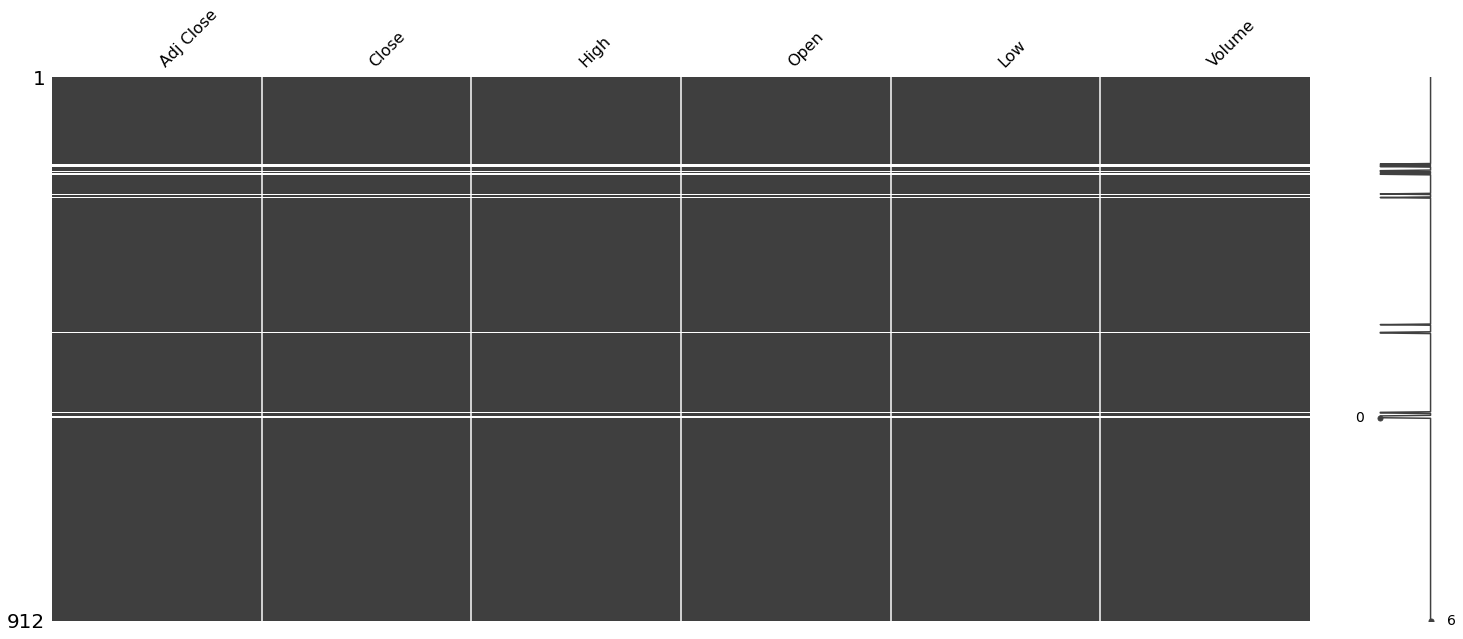

In [ ]:
mn.matrix(long_df2)

---
### Finding Circuit Points


In [ ]:
yf.pdr_override()

data2 = pdr.get_data_yahoo('SALASAR.NS', start="2023-03-04", end="2023-03-11",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-06,43.000000,47.150002,41.900002,47.150002,47.150002,1196712
2023-03-08,48.299999,50.400002,46.200001,48.200001,48.200001,2056660
2023-03-09,48.599998,50.200001,44.400002,46.500000,46.500000,892558
2023-03-10,46.599998,49.000000,46.200001,47.849998,47.849998,1065647


In [ ]:
a=np.zeros((len(data2),1))
data2['high_min_preclose%'] = a 
for i in range(1,len(data2)):
  data2['high_min_preclose%'][i] = ((data2['High'][i] - data2['Close'][i-1] )/(data2['Close'][i-1]))*100 
data2

<ipython-input-23-40461121477c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['high_min_preclose%'][i] = ((data2['High'][i] - data2['Close'][i-1] )/(data2['Close'][i-1]))*100


,Open,High,Low,Close,Adj Close,Volume,high_min_preclose%
Date,,,,,,,
2023-03-06,43.000000,47.150002,41.900002,47.150002,47.150002,1196712,0.000000
2023-03-08,48.299999,50.400002,46.200001,48.200001,48.200001,2056660,6.892895
2023-03-09,48.599998,50.200001,44.400002,46.500000,46.500000,892558,4.149378
2023-03-10,46.599998,49.000000,46.200001,47.849998,47.849998,1065647,5.376344


In [ ]:
def circuit(column):
    if column["high_min_preclose%"] >=5:
        cirpt= (column['Open']+column['Close'])/2
        return cirpt
    elif column["high_min_preclose%"]<=-5:
        cirpt= (column['Open']+column['Close'])/2
        return cirpt
    else:
      return 0
data2 = data2.assign(circuit=data2.apply(circuit, axis=1))
print(data2)

KeyError: ignored

In [ ]:
def extractData(data):
  if data['circuit']!=0:
    yf.pdr_override()
    Min_data = pdr.get_data_yahoo('SALASAR.NS', start= data.index, end=pd.to_datetime(data.index) + timedelta(days=1),interval="1m")
    return Min_data
data2 = data2.assign(data2.apply(extractData, axis=1))
print(data2)

ParserError: ignored

In [ ]:
yf.pdr_override()
Min_data = pdr.get_data_yahoo('OBCL.NS', start='2023-03-08', end='2023-03-11',interval="5m")
Min_data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- OBCL.NS: 5m data not available for startTime=1678213800 and endTime=1678473000. The requested range must be within the last 60 days.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
def Min_circuit(data):
    if data['Open'] == data['Close'] == data['High']: #== data['Low']:
        cirpt= data['High']
        return cirpt
    else:
      return None
Min_data = Min_data.assign(circuit=Min_data.apply(Min_circuit, axis=1))
print(Min_data)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, circuit]
Index: []


In [ ]:
print(Min_data.groupby(['circuit']).count())

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


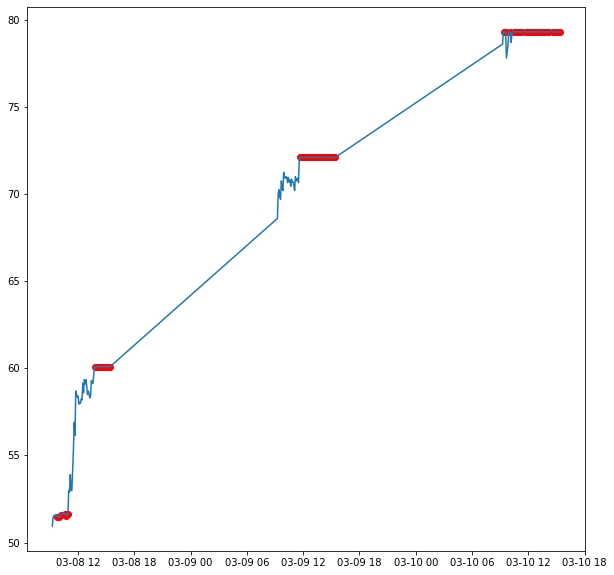

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(Min_data['Close'])
plt.scatter(Min_data.index, Min_data['circuit'], color='Red')
plt.show()

In [ ]:
def circiut_making(stock_name,i):
  Min_data = pdr.get_data_yahoo(stock_name, start='2023-04-07', end='2023-05-07',interval=i)
  Min_data = Min_data.assign(circuit=Min_data.apply(Min_circuit, axis=1))
  plt.figure(figsize=(10,10))
  plt.plot(Min_data['Close'])
  plt.scatter(Min_data.index, Min_data['circuit'], color='Red')
  plt.show()
  return Min_data

[*********************100%***********************]  1 of 1 completed


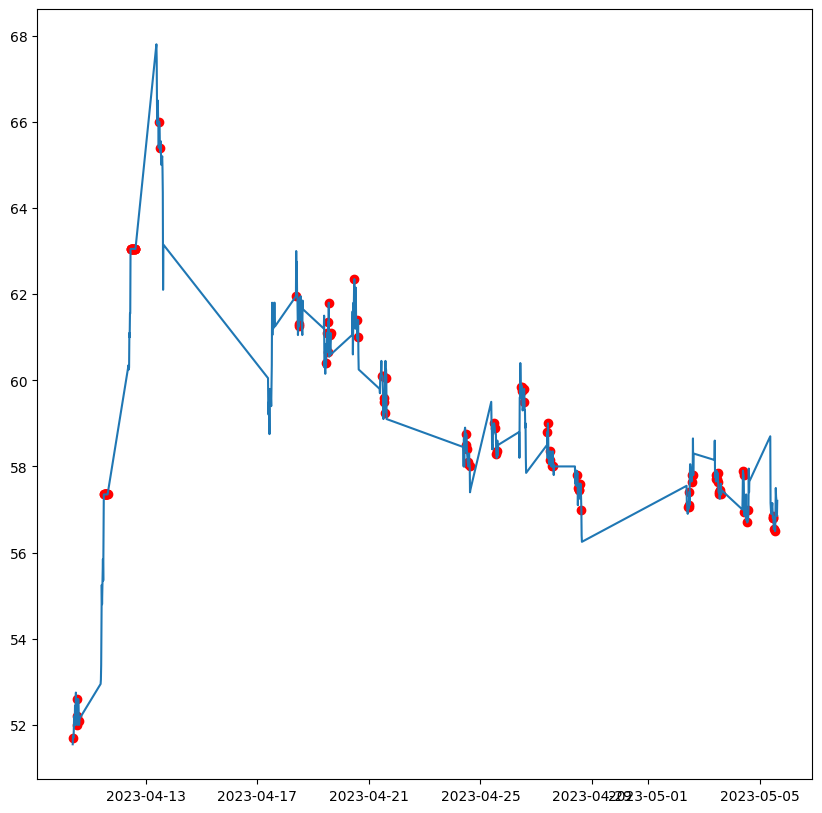

In [ ]:
data = circiut_making('OBCL.NS','15m')

In [ ]:
import datetime
data1 = data.dropna()
# d = pd.DataFrame()
for i in data1.circuit.unique():
  print(f'''For {i} 
  Start\t : {data1.query(f'circuit == {i}').head(1).index[0]}  
  End\t : {data1.query(f'circuit == {i}').tail(1).index[0] + datetime.timedelta(minutes=15)}
  Diff\t : {data1.query(f'circuit == {i}').tail(1).index[0] - data1.query(f'circuit == {i}').head(1).index[0] + datetime.timedelta(minutes=15)}  ''')
# print(d)

In [13]:
def circuit_status(data):
  if data['Open'] == data['Close'] == data['High'] == data['Low']:
    return 1
  else:
    return 0

In [14]:
import datetime
def upper_circuit_checker(dates):
  c_data = pdr.get_data_yahoo('OBCL.NS', start=dates, end = dates + datetime.timedelta(days=1),interval='1h')
  c_data = c_data.assign(circuit=c_data.apply(circuit_status, axis=1))
  if c_data.circuit.sum():
    return 1
  else:
    return 0

In [15]:
def lower_circuit_checker(dates):
  c_data = pdr.get_data_yahoo('OBCL.NS', start=dates, end = dates + datetime.timedelta(days=1),interval='1h')
  c_data = c_data.assign(circuit=c_data.apply(circuit_status, axis=1))
  if c_data.circuit.sum():
    return -1
  else:
    return 0

In [23]:
def find_circuits(data):
  # adding a column which show the maximum change of price in that day.
  a=np.zeros((len(data),1))
  b=np.zeros((len(data),1)) 
  a[0] = ((data['High'][0] - data['Open'][0] )/(data['Close'][0]))*100
  b[0] = ((data['Open'][0] - data['Low'][0] )/(data['Close'][0]))*100
  for i in range(1,len(data)):
    a[i] = ((data['High'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100 
    b[i] = ((data['Close'][i-1] - data['Low'][i] )/(data['Close'][i-1]))*100
  data['high_preclose%'] = a
  data['low_preclose%'] = b

  # adding a column to set which show if circuit is there or not
  data['upper_possible_circuit'] = np.where(data['high_preclose%'] >= 4.6, 1, 0)
  data['lower_possible_circuit'] = np.where(data['low_preclose%'] >= 4.6, 1, 0)

  # for date in data.query('possible_circuit == 1').index:
  for i in range(len(data)):
    if data['upper_possible_circuit'][i] == 1:
      a[i] = upper_circuit_checker(data.index[i])
    elif data['lower_possible_circuit'][i] == 1:
      a[i] = lower_circuit_checker(data.index[i])
    else:
      a[i] = 0
  data['circuit'] = a

  # printing Dates when the circuit has happened
  print('Dates on which there is upper circuits')
  for date in data.query('circuit == 1').index:
    print('--->',date)
  print('Dates on which there is lower circuits')
  for date in data.query('circuit == -1').index:
    print('--->',date)

  plt.figure(figsize=(13,3))
  plt.plot(data['Close'])
  # plt.scatter(data.query('possible_circuit == 1').index, data.query('possible_circuit == 1')['Close'], color='Blue')
  plt.scatter(data.query('circuit == 1').index, data.query('circuit == 1')['Close'], color='Green')
  plt.scatter(data.query('circuit == -1').index, data.query('circuit == -1')['Close'], color='Red')
  plt.show()

  return data

In [17]:
yf.pdr_override()
Min_data = pdr.get_data_yahoo('OBCL.NS', start='2023-01-01', end='2023-04-30',interval="1d")
Min_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,78.000000,85.000000,77.949997,78.849998,78.849998,118038
2023-01-03,78.750000,79.900002,76.349998,77.050003,77.050003,18096
2023-01-04,77.750000,81.300003,77.400002,79.449997,79.449997,29087
2023-01-05,79.000000,88.000000,79.000000,86.300003,86.300003,89627
2023-01-06,86.300003,94.000000,86.050003,88.699997,88.699997,146032
...,...,...,...,...,...,...
2023-04-24,57.349998,59.549999,55.500000,57.450001,57.450001,18358
2023-04-25,58.700001,59.599998,58.099998,58.500000,58.500000,15253
2023-04-26,58.750000,60.750000,57.150002,57.849998,57.849998,19927


In [11]:
# circuit_checker('2023-03-08')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

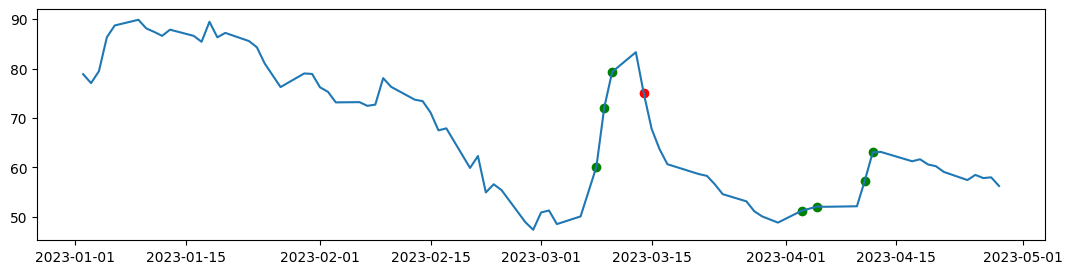

In [24]:
data = find_circuits(Min_data)
# print(data)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,high_preclose%,possible_circuit,circuit
Date,,,,,,,,,
2023-01-02,78.000000,85.000000,77.949997,78.849998,78.849998,118038,8.877616,1,0.0
2023-01-03,78.750000,79.900002,76.349998,77.050003,77.050003,18096,1.331646,0,0.0
2023-01-04,77.750000,81.300003,77.400002,79.449997,79.449997,29087,5.515899,1,0.0
2023-01-05,79.000000,88.000000,79.000000,86.300003,86.300003,89627,10.761489,1,0.0
2023-01-06,86.300003,94.000000,86.050003,88.699997,88.699997,146032,8.922360,1,0.0
...,...,...,...,...,...,...,...,...,...
2023-04-24,57.349998,59.549999,55.500000,57.450001,57.450001,18358,0.761423,0,0.0
2023-04-25,58.700001,59.599998,58.099998,58.500000,58.500000,15253,3.742381,0,0.0
2023-04-26,58.750000,60.750000,57.150002,57.849998,57.849998,19927,3.846154,0,0.0
